In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path = 'flights_data.csv' #file loading 
flight_data = pd.read_csv(path)

flight_data.fillna(0, inplace=True) # zeros whereever there are zeros

# for statistical  summary of the dataset of each colume 
summary = flight_data.describe()
print(summary)


C:\Users\Parimala Cheruku\AppData\Local\Temp\ipykernel_12276\232392413.py:6: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  flight_data = pd.read_csv(path)


       FLIGHT_NUMBER         MONTH           DAY   DAY_OF_WEEK  \
count   5.819079e+06  5.819079e+06  5.819079e+06  5.819079e+06   
mean    2.173093e+03  6.524085e+00  1.570459e+01  3.926941e+00   
std     1.757064e+03  3.405137e+00  8.783425e+00  1.988845e+00   
min     1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
25%     7.300000e+02  4.000000e+00  8.000000e+00  2.000000e+00   
50%     1.690000e+03  7.000000e+00  1.600000e+01  4.000000e+00   
75%     3.230000e+03  9.000000e+00  2.300000e+01  6.000000e+00   
max     9.855000e+03  1.200000e+01  3.100000e+01  7.000000e+00   

       SCHEDULED_DEPARTURE  DEPARTURE_TIME  SCHEDULED_ARRIVAL  ARRIVAL_TIME  \
count         5.819079e+06    5.819079e+06       5.819079e+06  5.819079e+06   
mean          1.329602e+03    1.315436e+03       1.493808e+03  1.453018e+03   
std           4.837518e+02    5.184507e+02       5.071647e+02  5.538195e+02   
min           1.000000e+00    0.000000e+00       1.000000e+00  0.000000e+00   
25%       

In [3]:

print(flight_data.shape)  #shape of the data
print(flight_data.dtypes)  #datatype of the data 

(5819079, 12)
FLIGHT_NUMBER            int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
DEPARTURE_TIME         float64
SCHEDULED_ARRIVAL        int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
dtype: object


In [5]:
num_columns = ['MONTH', 'DAY', 'DAY_OF_WEEK', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME',  # since only number present
                     'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY']
char_columns = ['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']  # have charckers  only number present


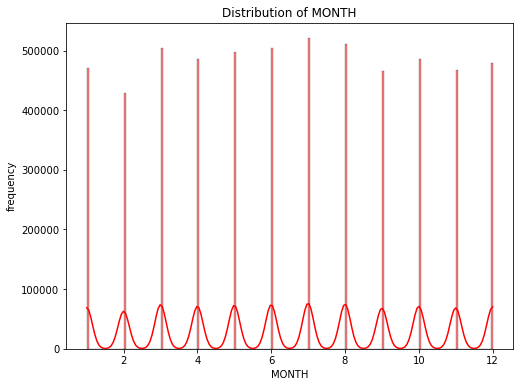

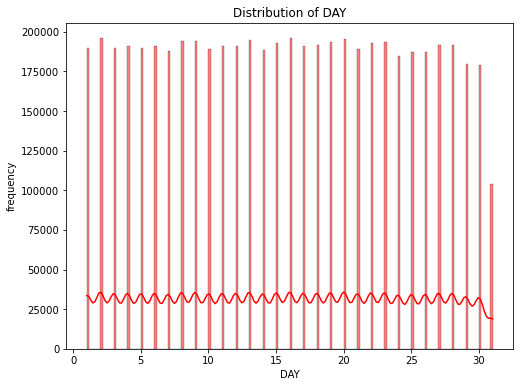

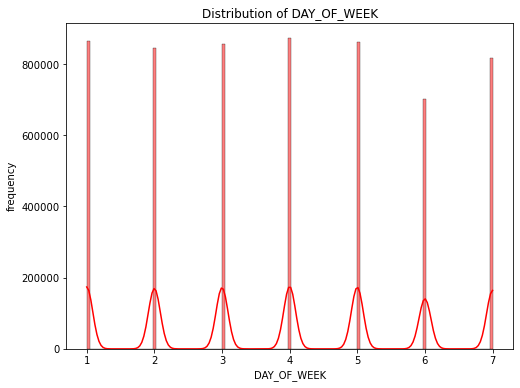

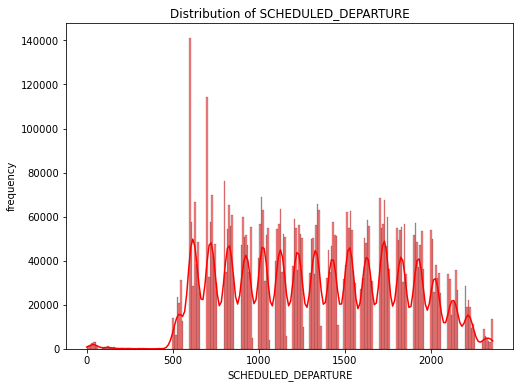

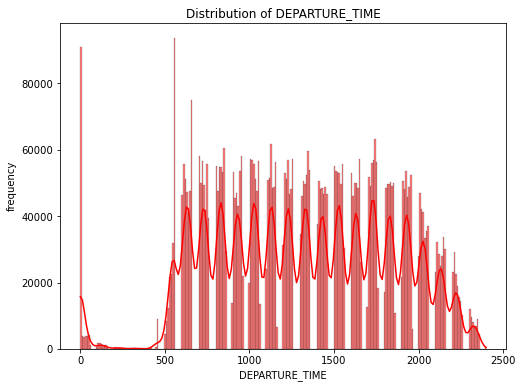

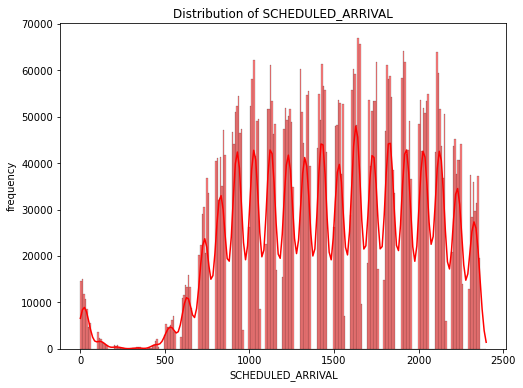

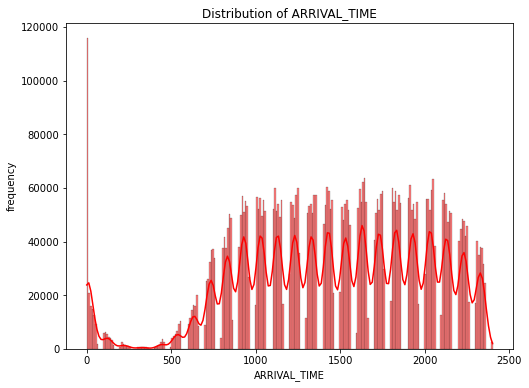

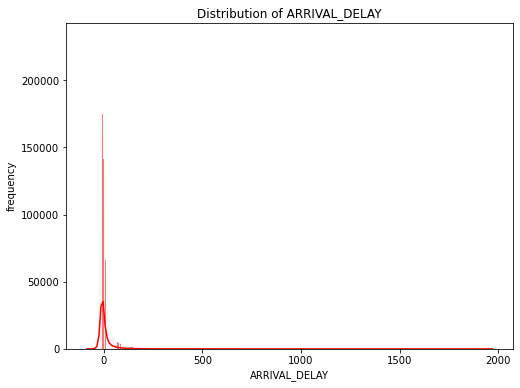

In [6]:
for col in num_columns: # FOR THE NUM COLUMS 
    plt.figure(figsize=(8, 6))
    sns.histplot(flight_data[col], kde=True, color='RED')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('frequency')
    plt.show()

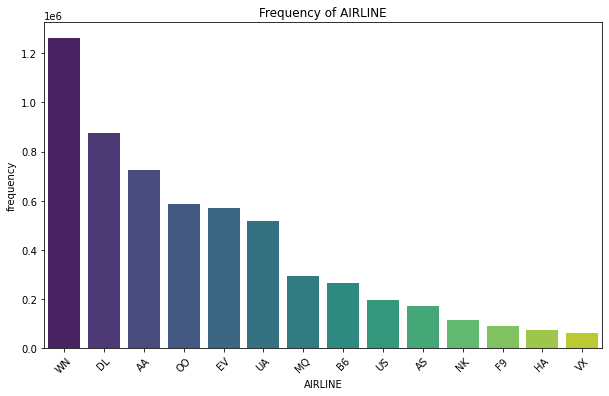

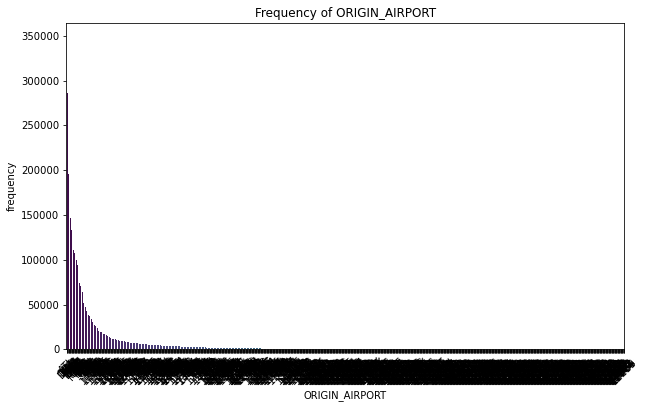

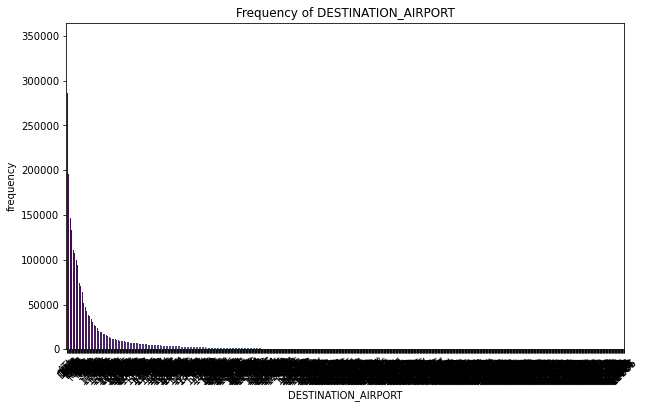

In [7]:
for col in char_columns: # FOR THE cHAR COLUMS 
    plt.figure(figsize=(10, 6))
    sns.countplot(data=flight_data, x=col, order=flight_data[col].value_counts().index, palette='viridis')
    plt.title(f'Frequency of {col}')
    plt.xlabel(col)
    plt.ylabel('frequency')
    plt.xticks(rotation=45)
    plt.show()


In [9]:
print(flight_data.head())

   FLIGHT_NUMBER  MONTH  DAY  DAY_OF_WEEK AIRLINE ORIGIN_AIRPORT  \
0             98      1    1            4      AS            ANC   
1           2336      1    1            4      AA            LAX   
2            840      1    1            4      US            SFO   
3            258      1    1            4      AA            LAX   
4            135      1    1            4      AS            SEA   

  DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  DEPARTURE_TIME  SCHEDULED_ARRIVAL  \
0                 SEA                    5          2354.0                430   
1                 PBI                   10             2.0                750   
2                 CLT                   20            18.0                806   
3                 MIA                   20            15.0                805   
4                 ANC                   25            24.0                320   

   ARRIVAL_TIME  ARRIVAL_DELAY  
0         408.0          -22.0  
1         741.0           -9.0  
2    

In [10]:
summary_all = flight_data.describe(include='all') # to get the stat of all
print(summary_all)

        FLIGHT_NUMBER         MONTH           DAY   DAY_OF_WEEK  AIRLINE  \
count    5.819079e+06  5.819079e+06  5.819079e+06  5.819079e+06  5819079   
unique            NaN           NaN           NaN           NaN       14   
top               NaN           NaN           NaN           NaN       WN   
freq              NaN           NaN           NaN           NaN  1261855   
mean     2.173093e+03  6.524085e+00  1.570459e+01  3.926941e+00      NaN   
std      1.757064e+03  3.405137e+00  8.783425e+00  1.988845e+00      NaN   
min      1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00      NaN   
25%      7.300000e+02  4.000000e+00  8.000000e+00  2.000000e+00      NaN   
50%      1.690000e+03  7.000000e+00  1.600000e+01  4.000000e+00      NaN   
75%      3.230000e+03  9.000000e+00  2.300000e+01  6.000000e+00      NaN   
max      9.855000e+03  1.200000e+01  3.100000e+01  7.000000e+00      NaN   

       ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  \
count         5819079

In [12]:
total_flights = len(flight_data)
delayed_flights = len(flight_data[flight_data['ARRIVAL_DELAY'] > 15])
percentage_delayed = (delayed_flights / total_flights) * 100
print("percentage delayed is" , percentage_delayed) # percentage of flights deplayed 


percentage delayed is 17.588659648717606


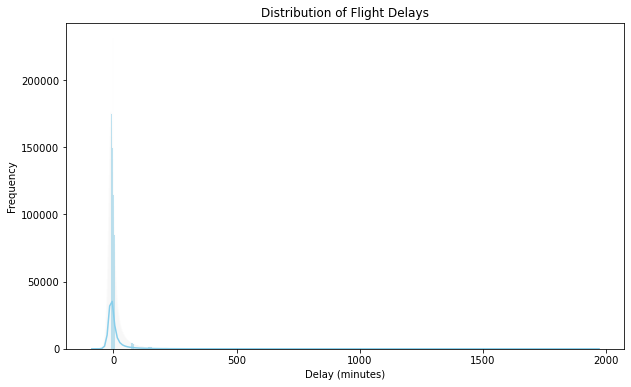

In [13]:
plt.figure(figsize=(10, 6)) # vis the flight delay
sns.histplot(flight_data['ARRIVAL_DELAY'], kde=True, color='skyblue')
plt.title('Distribution of Flight Delays')
plt.xlabel('Delay (minutes)')
plt.ylabel('Frequency')
plt.show()

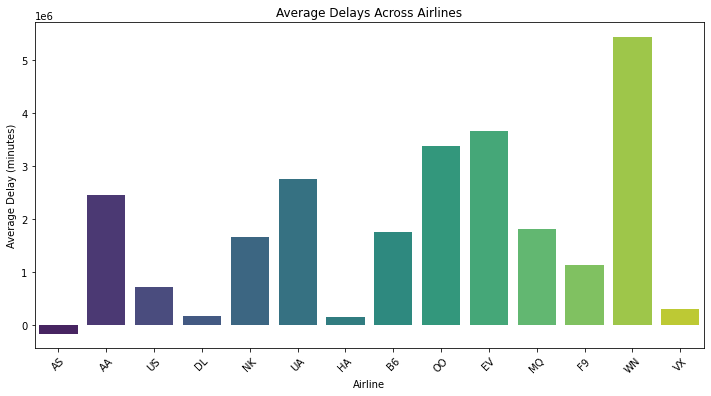

In [14]:
plt.figure(figsize=(12, 6)) #Compare average delays across different airlines.
sns.barplot(x='AIRLINE', y='ARRIVAL_DELAY', data=flight_data, estimator=sum, ci=None, palette='viridis') 
plt.title('Average Delays Across Airlines')
plt.xlabel('Airline')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=45)
plt.show()

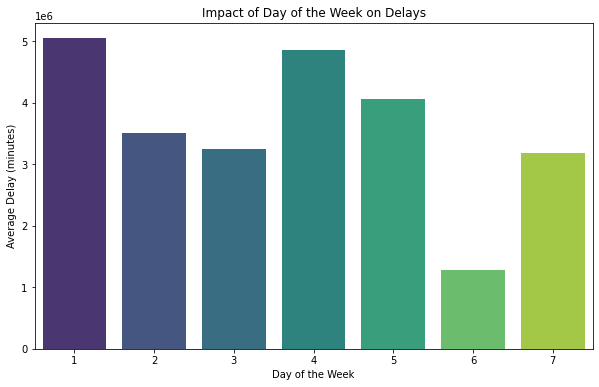

In [15]:
plt.figure(figsize=(10, 6)) # Investigate the impact of the day of the week on delays.
sns.barplot(x='DAY_OF_WEEK', y='ARRIVAL_DELAY', data=flight_data, estimator=sum, ci=None, palette='viridis')
plt.title('Impact of Day of the Week on Delays')
plt.xlabel('Day of the Week')
plt.ylabel('Average Delay (minutes)')
plt.show()

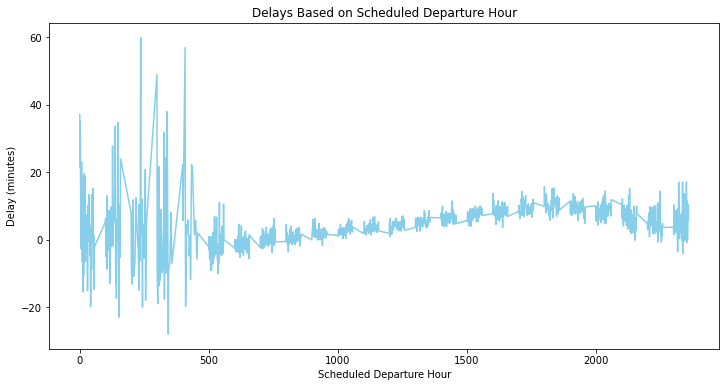

In [16]:
plt.figure(figsize=(12, 6)) #  any patern of delays based on the scheduled departure hour.
sns.lineplot(x='SCHEDULED_DEPARTURE', y='ARRIVAL_DELAY', data=flight_data, ci=None, color='skyblue')
plt.title('Delays Based on Scheduled Departure Hour')
plt.xlabel('Scheduled Departure Hour')
plt.ylabel('Delay (minutes)')
plt.show()

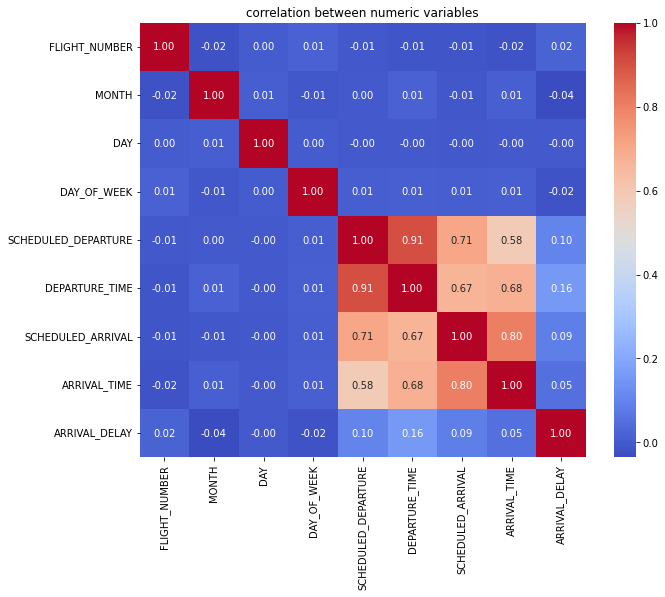

In [18]:
correlat = flight_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlat, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('correlation between numeric variables')
plt.show()

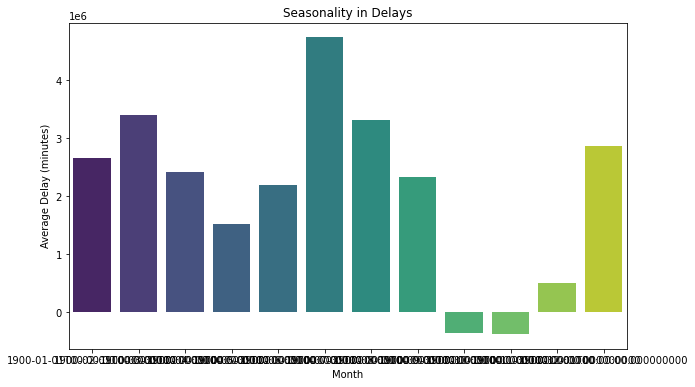

In [19]:
flight_data['MONTH'] = pd.to_datetime(flight_data['MONTH'], format='%m')

# Check for seasonality in delays based on months
plt.figure(figsize=(10, 6))
sns.barplot(x='MONTH', y='ARRIVAL_DELAY', data=flight_data, estimator=sum, ci=None, palette='viridis')
plt.title('Seasonality in Delays')
plt.xlabel('Month')
plt.ylabel('Average Delay (minutes)')
plt.show()


In [21]:

origin_destination_delays = flight_data.groupby(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']).agg({'ARRIVAL_DELAY': 'mean'}).reset_index()
highest_avg_delays = origin_destination_delays.sort_values(by='ARRIVAL_DELAY', ascending=False).head(5)
print(highest_avg_delays) # origin-desination pairs 


      ORIGIN_AIRPORT DESTINATION_AIRPORT  ARRIVAL_DELAY
9688             IAD                 TTN          381.0
7410           14869               13264          268.0
12200            SWF                 PBI          260.5
5997           13158               11298          248.0
11537            RIC                 CAE          228.0


In [23]:

frequent_routes = flight_data.groupby(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']).size().reset_index(name='FREQUENCY')
frequent_routes_with_delays = frequent_routes.merge(origin_destination_delays, on=['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT'])
top_10_frequent_routes_with_delays = frequent_routes_with_delays.nlargest(10, 'FREQUENCY') # top deplays 
print(top_10_frequent_routes_with_delays[['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'ARRIVAL_DELAY']])


      ORIGIN_AIRPORT DESTINATION_AIRPORT  ARRIVAL_DELAY
11867            SFO                 LAX      11.153667
10165            LAX                 SFO      10.461470
9949             JFK                 LAX      -2.635320
10130            LAX                 JFK       0.605493
10053            LAS                 LAX      11.895728
10253            LGA                 ORD       3.585849
10132            LAX                 LAS       8.590577
11085            ORD                 LGA       9.778068
11864            SFO                 JFK       2.107464
9974             JFK                 SFO      -0.546047


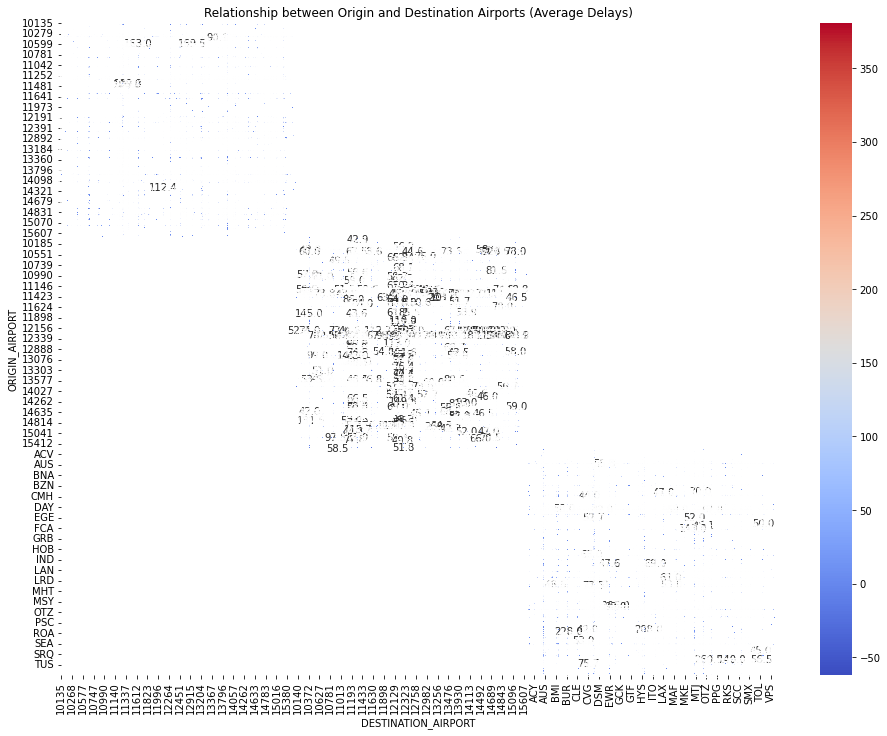

In [25]:
pivot = flight_data.pivot_table(index='ORIGIN_AIRPORT', columns='DESTINATION_AIRPORT', values='ARRIVAL_DELAY', aggfunc='mean') # for heat map
plt.figure(figsize=(16, 12))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap="coolwarm")
plt.title('Relationship between Origin and Destination Airports (Average Delays)')
plt.show()